# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, OrdinalEncoder, StandardScaler


In [2]:
# Abrindo os dados
df = pd.read_csv("dataset/Heart_Attack_Data_Set.csv")
# Escolhendo essa paleta de cores
sns.set_palette("muted")

# Como estão meus dados ? 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Explicação dos atributos:  

### **1. age**: Idade em anos.  
### **2. sex**: Sexo (1 = masculino; 0 = feminino).  
### **3. cp**: Tipo de dor no peito.  
- Valor 1: Angina típica  
- Valor 2: Angina atípica  
- Valor 3: Dor não anginosa  
- Valor 4: Assintomático  
### **4. trestbps**: Pressão arterial em repouso (em mm Hg na admissão hospitalar).  
### **5. chol**: Colesterol sérico em mg/dL.  
### **6. fbs**: Glicose em jejum (> 120 mg/dL) (1 = verdadeiro; 0 = falso).  
### **7. restecg**: Resultados do eletrocardiograma em repouso.  
- Valor 0: Normal  
- Valor 1: Anormalidade na onda ST-T (inversões da onda T e/ou depressão do segmento ST).  
### **8. thalach**: Frequência cardíaca máxima atingida.  
### **9. exang**: Angina induzida por exercício (1 = sim; 0 = não).
### **10. oldpeak** = Refere-se a um valor relacionado à depressão do segmento ST no eletrocardiograma (ECG) durante um teste de esforço (exercício), comparado com o repouso  
### **11. slope**: Inclinação do segmento ST no pico do exercício.  
- Valor 1: Ascendente  
- Valor 2: Plano  
- Valor 3: Descendente  
### **12. ca**: Número de vasos sanguíneos principais (0-3) coloridos por fluoroscopia.  
### **13. thal**: Uma doença genética que afeta a habilidade de produzir hemoglobina.  
- Valor 3: Normal  
- Valor 6: Defeito fixo  
- Valor 7: Defeito reversível  
### **target**: Variável alvo (1 = com doença; 0 = sem doença)



In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Observações:
- Os pacientes tem ume média de mediana de idade próximo aos 55 anos, o que pode indicar pacientes mais velhos.
- Parece que a maioria dos paciente possuem angina típica, que é uma dor ou deconforto no peito, quando se faz exercícios físicos ou estresse.

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


## Observações:
- Não parece haver problemas de falta de dados.
- Há apenas uma linha duplicada, aparentemente parece ser um problema devido a ser uma linha seguida da outra, então removerei uma delas.

In [5]:
df.drop_duplicates(keep=False, inplace=True)

In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Separando as colunas e cada tipo
categorical_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical_features = df.drop(columns=categorical_features + ['target']).columns

print(f"Essas são as variáveis categoricas tamanho {len(categorical_features)}:\n {categorical_features}")
print(f"Essas são as variáveis numéricas {len(numerical_features)}:\n {numerical_features}")

Essas são as variáveis categoricas tamanho 8:
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
Essas são as variáveis numéricas 5:
 Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


In [7]:
X = df.drop(columns=['target'])
y = df['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [8]:
for categorical in categorical_features:
    print('-'*20)
    print(df[categorical].value_counts(normalize=True))

--------------------
sex
1    0.681063
0    0.318937
Name: proportion, dtype: float64
--------------------
cp
0    0.475083
2    0.282392
1    0.166113
3    0.076412
Name: proportion, dtype: float64
--------------------
fbs
0    0.850498
1    0.149502
Name: proportion, dtype: float64
--------------------
restecg
1    0.498339
0    0.488372
2    0.013289
Name: proportion, dtype: float64
--------------------
exang
0    0.671096
1    0.328904
Name: proportion, dtype: float64
--------------------
slope
2    0.465116
1    0.465116
0    0.069767
Name: proportion, dtype: float64
--------------------
ca
0    0.581395
1    0.215947
2    0.126246
3    0.066445
4    0.009967
Name: proportion, dtype: float64
--------------------
thal
2    0.544850
3    0.388704
1    0.059801
0    0.006645
Name: proportion, dtype: float64


## Observações:
- A maioria da categorias já veio codificada, mas precisamos modificar isso para o modelo, a única característica que a gente pode manter a cardinalidade é o 'slope'
- Vamos modificar para a codificação das que não são binárias para target enconder, para não tornar a matriz muito sparsa.

# EDA

In [9]:
df_train = pd.concat([X_train,y_train],axis=1)

C:\Users\Fiuza\AppData\Local\Temp\ipykernel_12040\1236454037.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


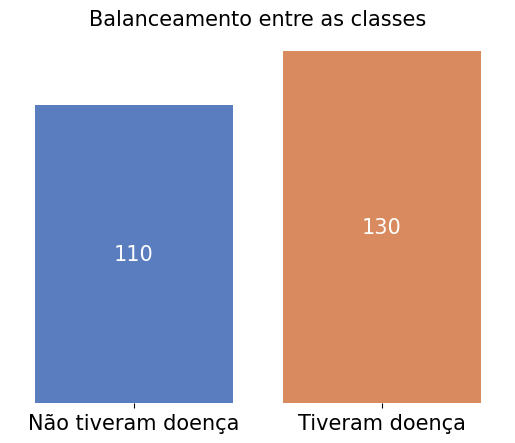

In [13]:
df_heart_disease = df_train['target'].value_counts()
df_heart_disease = df_heart_disease.reset_index()

ax = sns.barplot(x='target',y='count',data=df_heart_disease,palette='muted',hue='target',legend=False)
ax.set_xlabel('')
ax.yaxis.set_visible(False)
ax.set_title('Balanceamento entre as classes',fontsize=15)
ax.set_xticks(range(2),['Não tiveram doença','Tiveram doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.legend().set_visible(False)

for bar in ax.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
    y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
    ax.text(x, y, f'{height:.0f}', ha='center', va='center', fontsize=15, color='white')
    

In [71]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0',
  '#DD8452',
  '#55A868',
  '#C44E52',
  '#8172B3',
  '#937860',
  '#DA8BC3',
  '#8C8C8C',
  '#CCB974',
  '#64B5CD'],
 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'],
 'muted': ['#4878D0',
  '#EE854A',
  '#6ACC64',
  '#D65F5F',
  '#956CB4',
  '#8C613C',
  '#DC7EC0',
  '#797979',
  '#D5BB67',
  '#82C6E2'],
 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'],
 'pastel': ['#A1C9F4',
  '#FFB482',
  '#8DE5A1',
  '#FF9F9B',
  '#D0BBFF',
  '#DEBB9B',
  '#FAB0E4',
  '#CFCFCF',
  '#FFFEA3',
  '#B9F2F0'],
 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'],
 'bright': ['#023EFF',
  '#FF7C00',
  '#1AC938',
  '#E8000B',
  '#8B2BE2',
  '#9F4800',
  '#F14CC1',
  '#A3A3A3',
  '#FFC400',
  '#00D7FF'],
 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F',
  '#B1400D',
  '#12711C',
  '#8C0800',
  '#591E71',
  '#592F0D',
  '#A23582',
  '#3C3C3C',
  '#B8850A

In [65]:
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [ ]:
sns.color_palette("pastel")

In [26]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

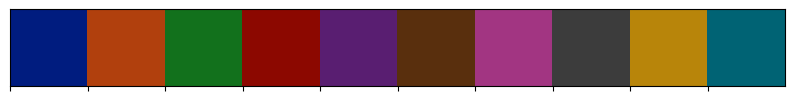

In [75]:
sns.palplot(sns.color_palette("dark"))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

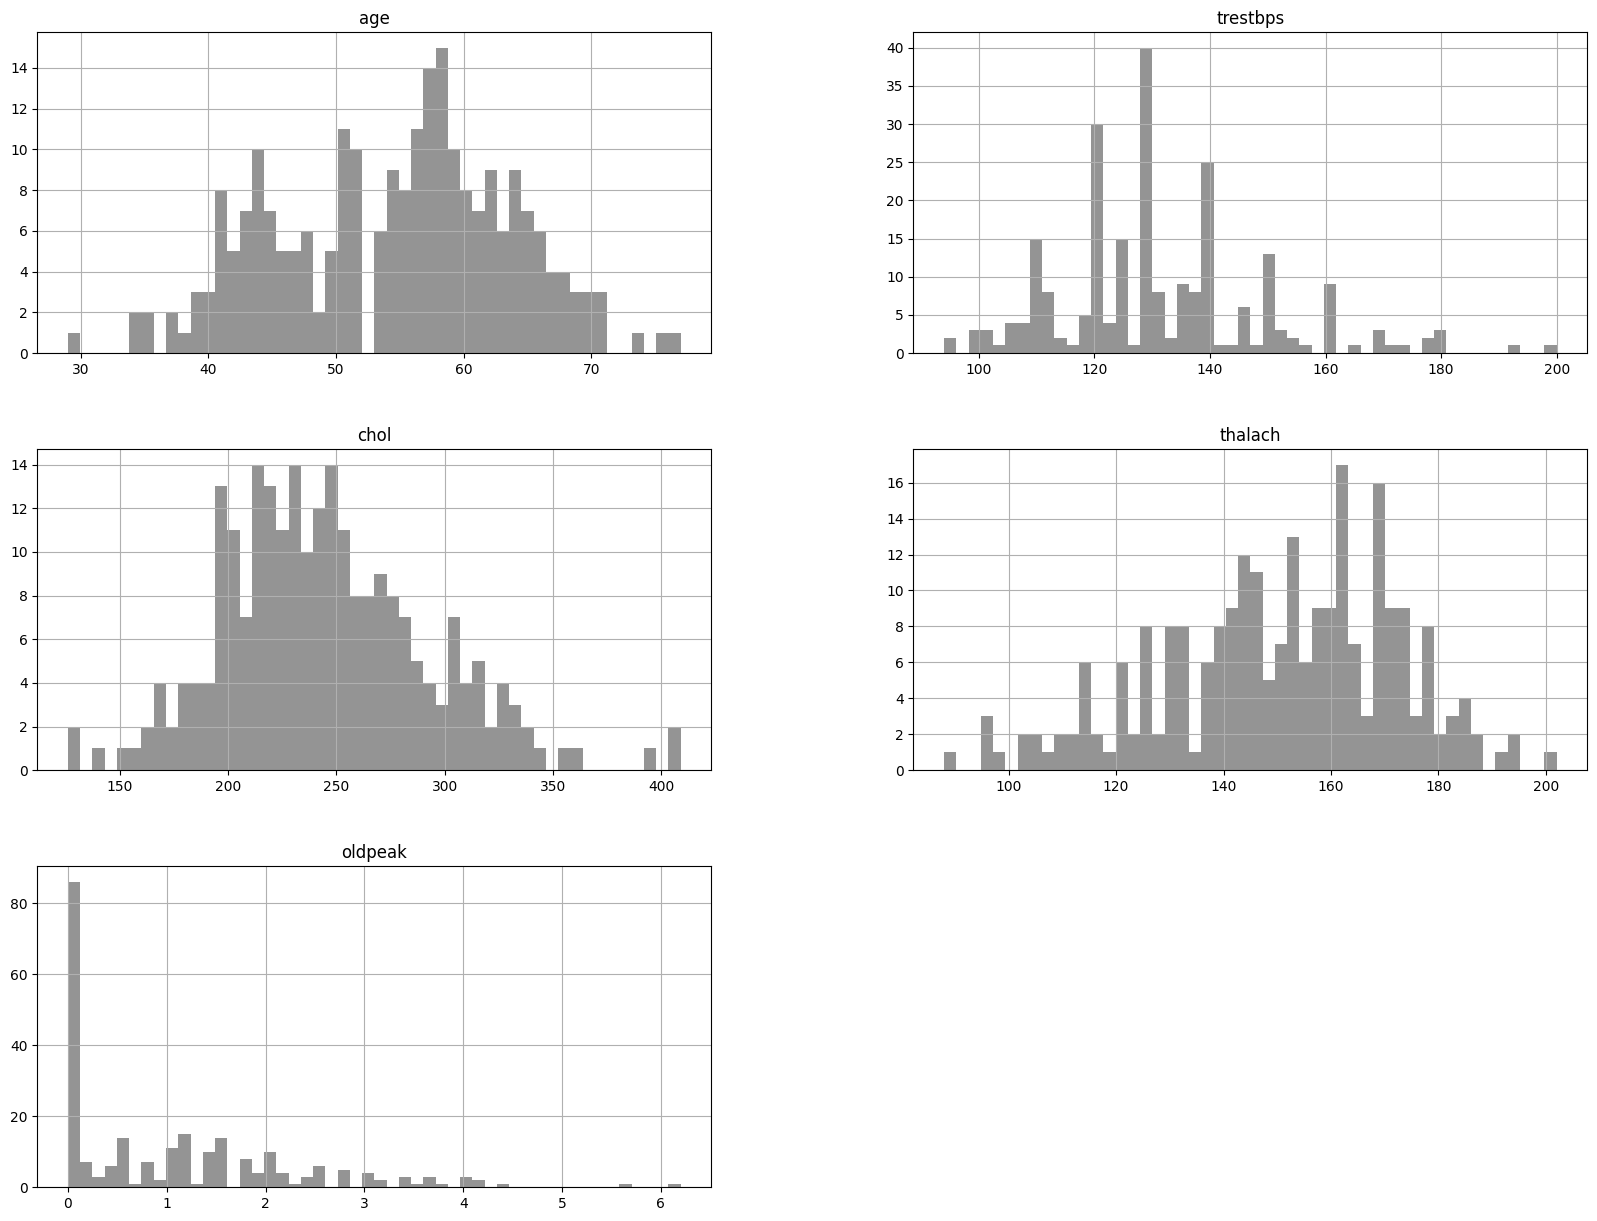

In [27]:
X_train[numerical_features].hist(bins=50, figsize=(20,15),color='#949494')

## Observações : 
- A maioria dos pacientes tem entre 40 e 50 anos.
- A maioria tem um oldpeak baixo, vamos ver em seguida como isso fica representado separando entre a classe target. 


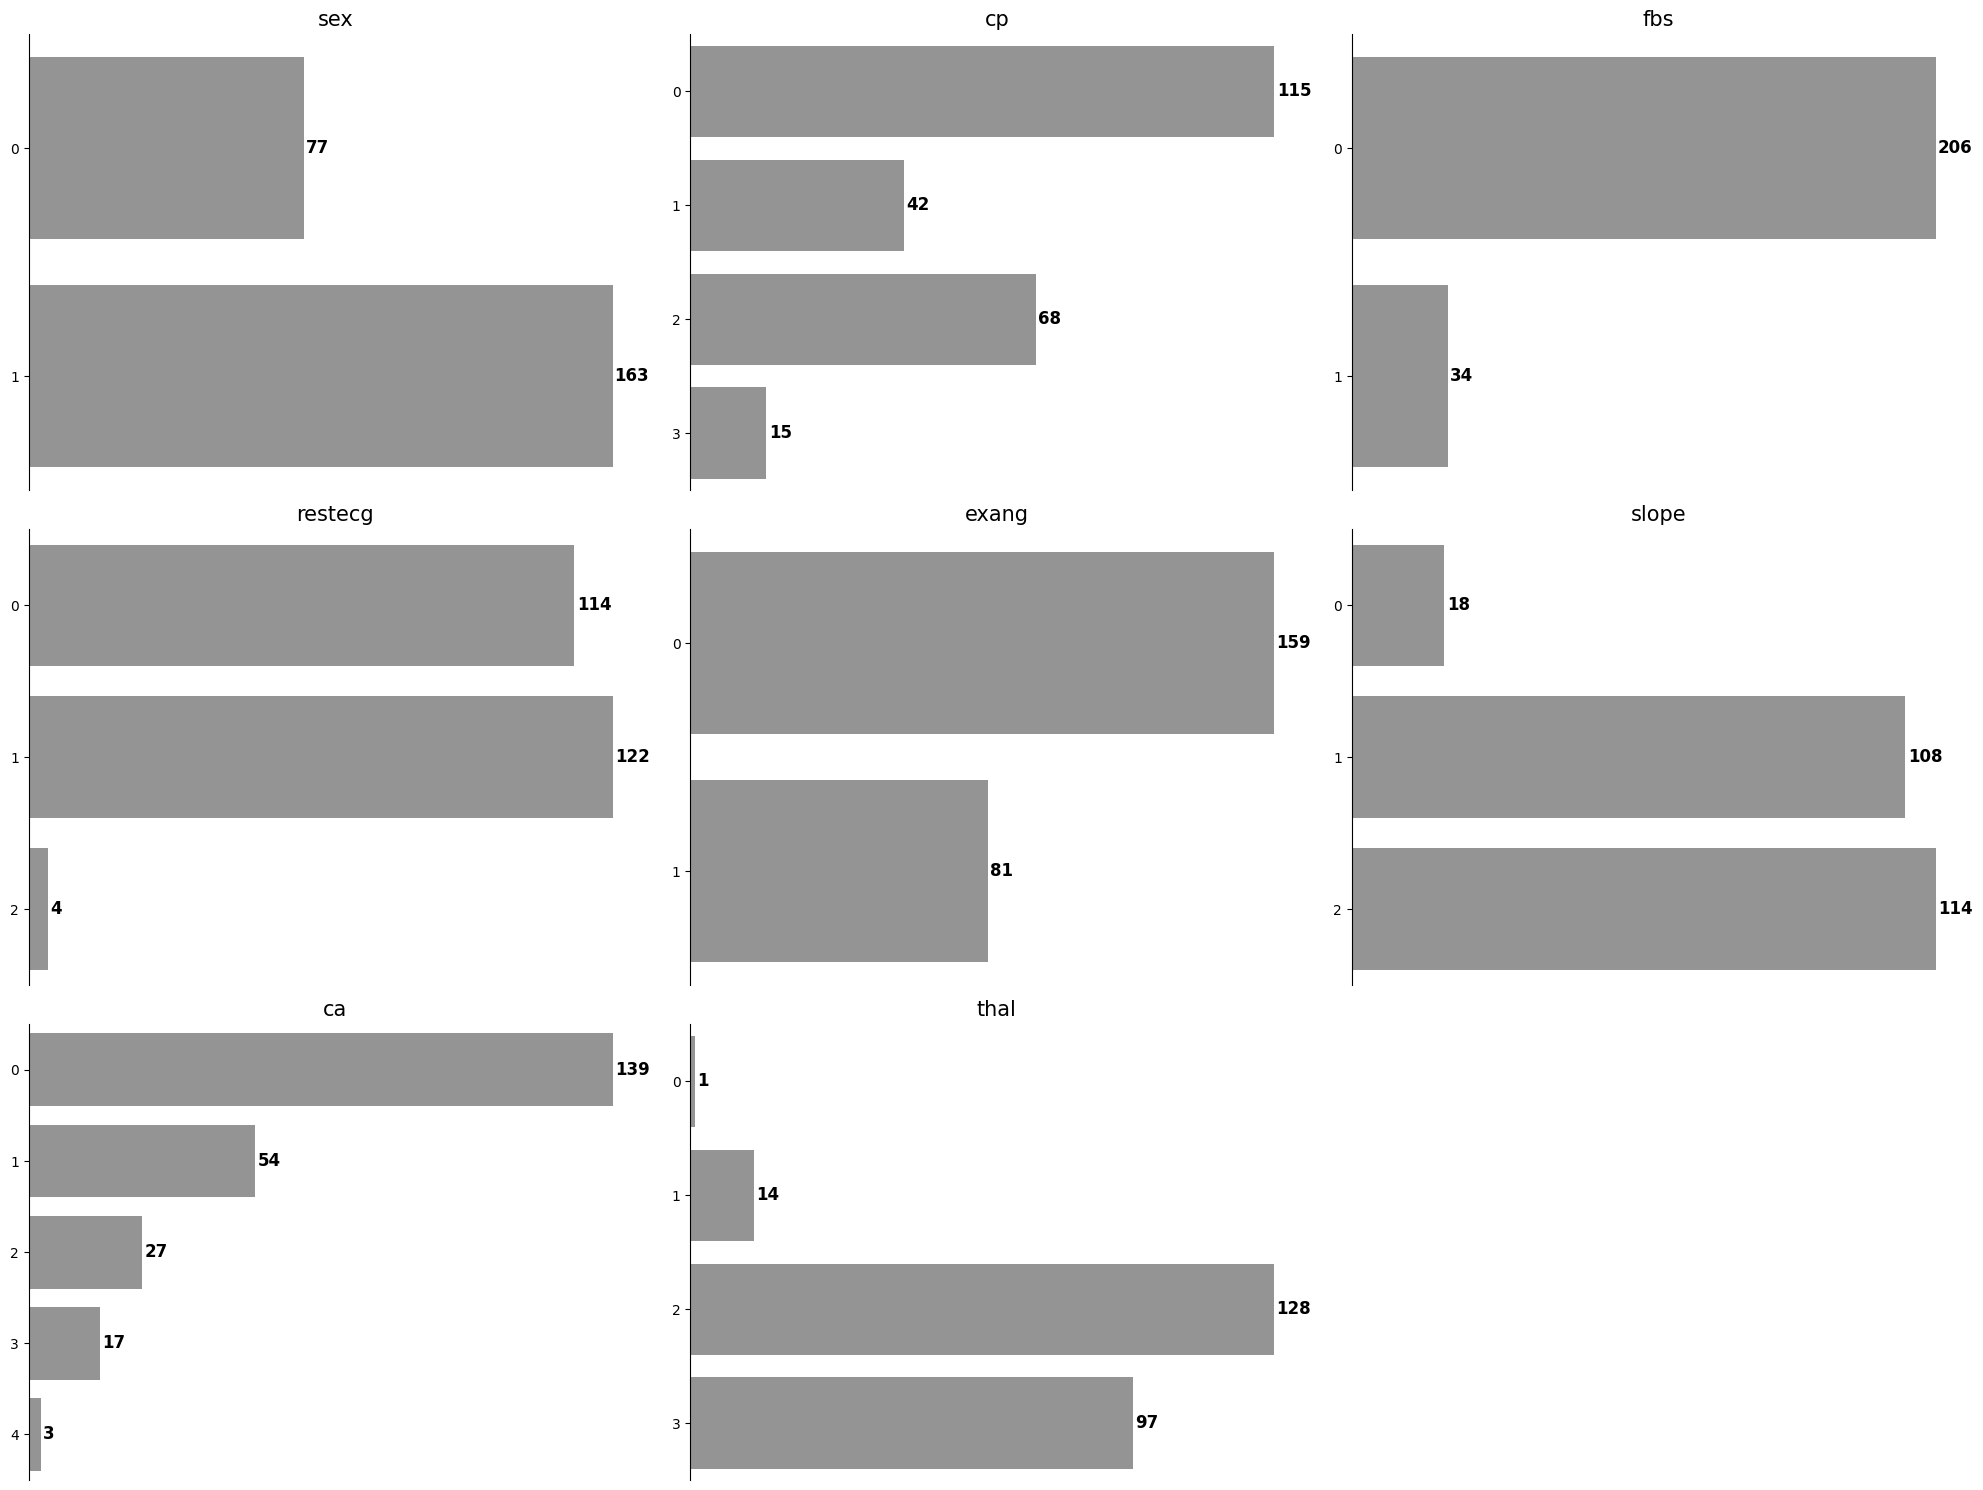

In [14]:
num_vars = len(categorical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=X_train, ax=axes[num],color='#949494')
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
    axes[num].spines["bottom"].set_visible(False) 
    axes[num].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
     

    for bar in axes[num].patches:
        count = bar.get_width()
        x = count + 0.5  # Centralizar o rótulo na barra
        y = bar.get_y() + bar.get_height() / 2  # Centralizar o rótulo verticalmente
        axes[num].text(x, y, f'{int(count)}', ha='left', va='center', fontsize=12, color='black',fontweight='bold')    

# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

## Observações:
- A maioria das pessoas não apresentaram a glicose maior que 120 ml /dl, um valor maior que esse pode ser considerado diabetes.
- Ta um pouco estranho o thal pois aparentemente seriam encontrados os valores 3,6 e 7 mas foi mostrado 4 classes, provavelmente deve haver um erro na classe 0.

In [15]:
# Dando uma conferida na base para saber se há mais algum dado com esse thal 0
df[df['thal']==0]
# Vou verificar mais para frente se ela seria importante para decidir entre as classes


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


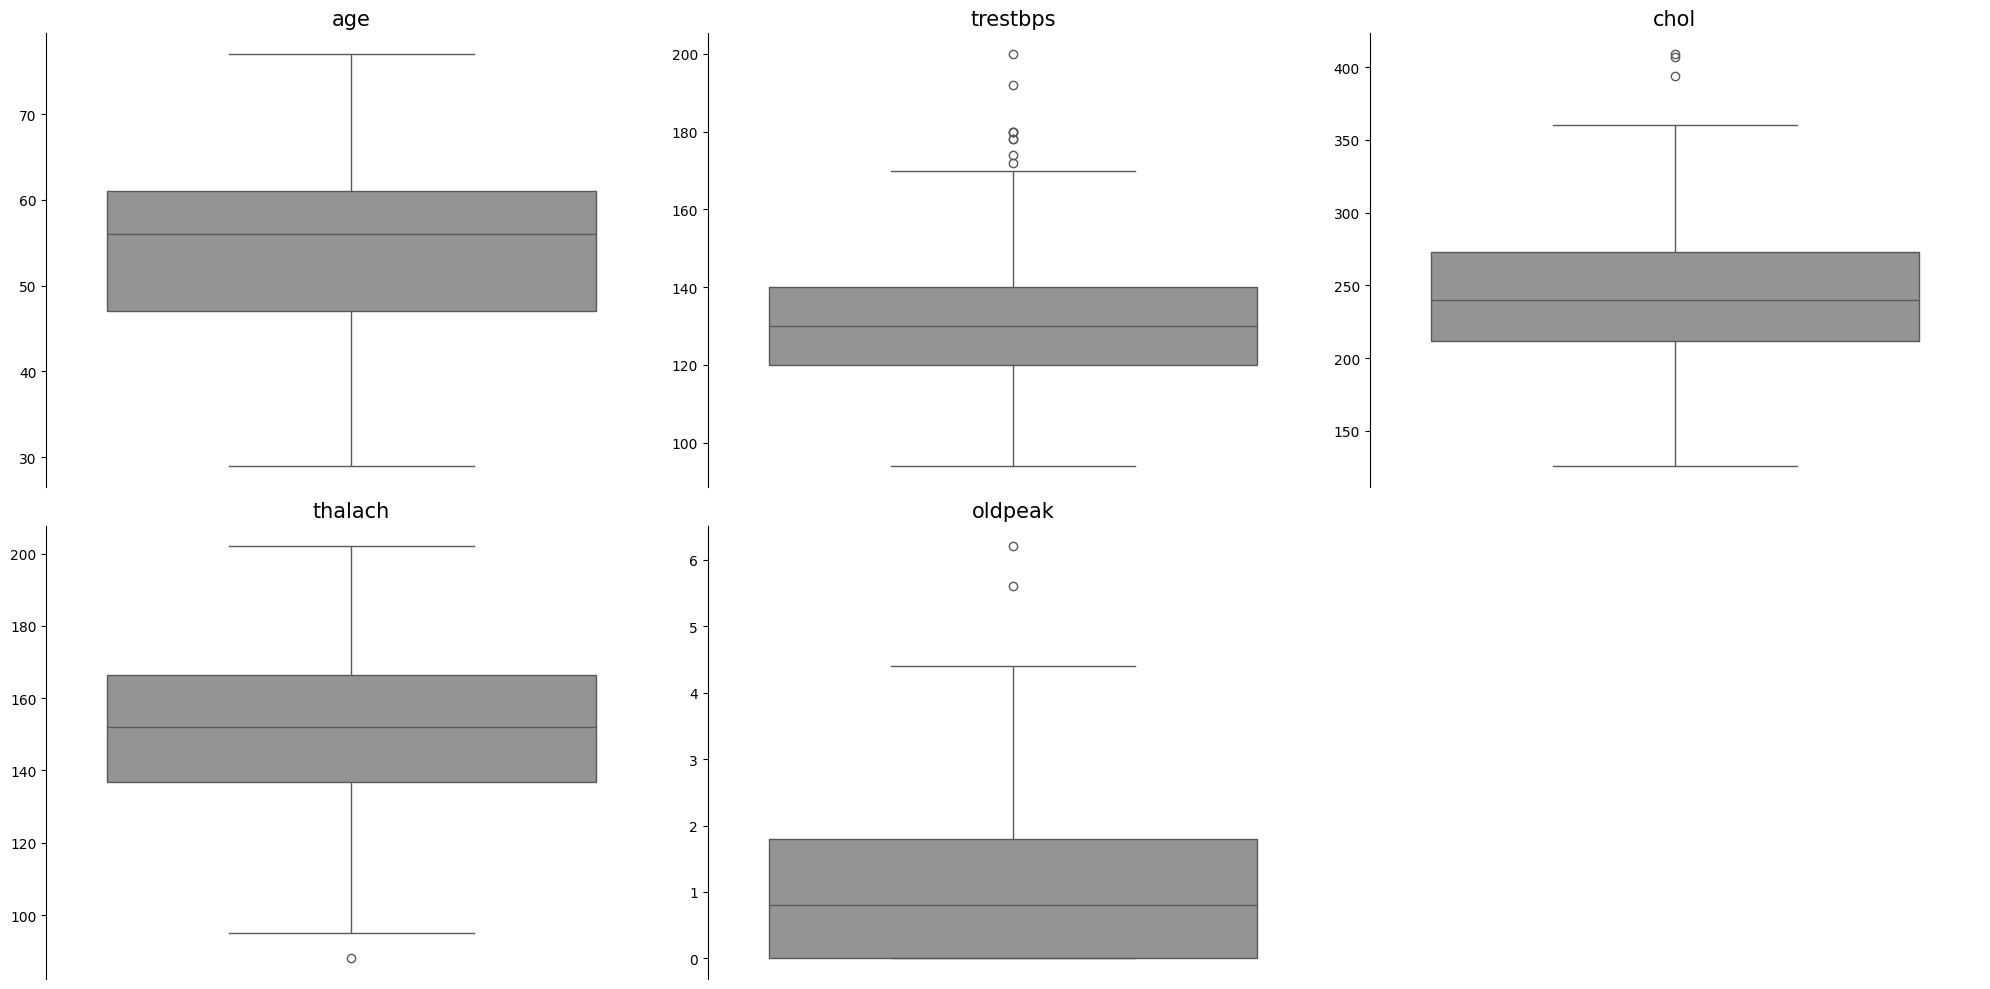

In [33]:
num_vars = len(numerical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(numerical_features):
    sns.boxplot(y=feature, data=X_train, ax=axes[num],color='#949494')
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
    axes[num].spines["bottom"].set_visible(False) 
    axes[num].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
     

    # for bar in axes[num].patches:
    #     count = bar.get_width()
    #     x = count + 0.5  # Centralizar o rótulo na barra
    #     y = bar.get_y() + bar.get_height() / 2  # Centralizar o rótulo verticalmente
    #     axes[num].text(x, y, f'{int(count)}', ha='left', va='center', fontsize=12, color='black',fontweight='bold')    

# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

## Observações :
- Não parece haver problema com muitos outliers, por isso vou manter.

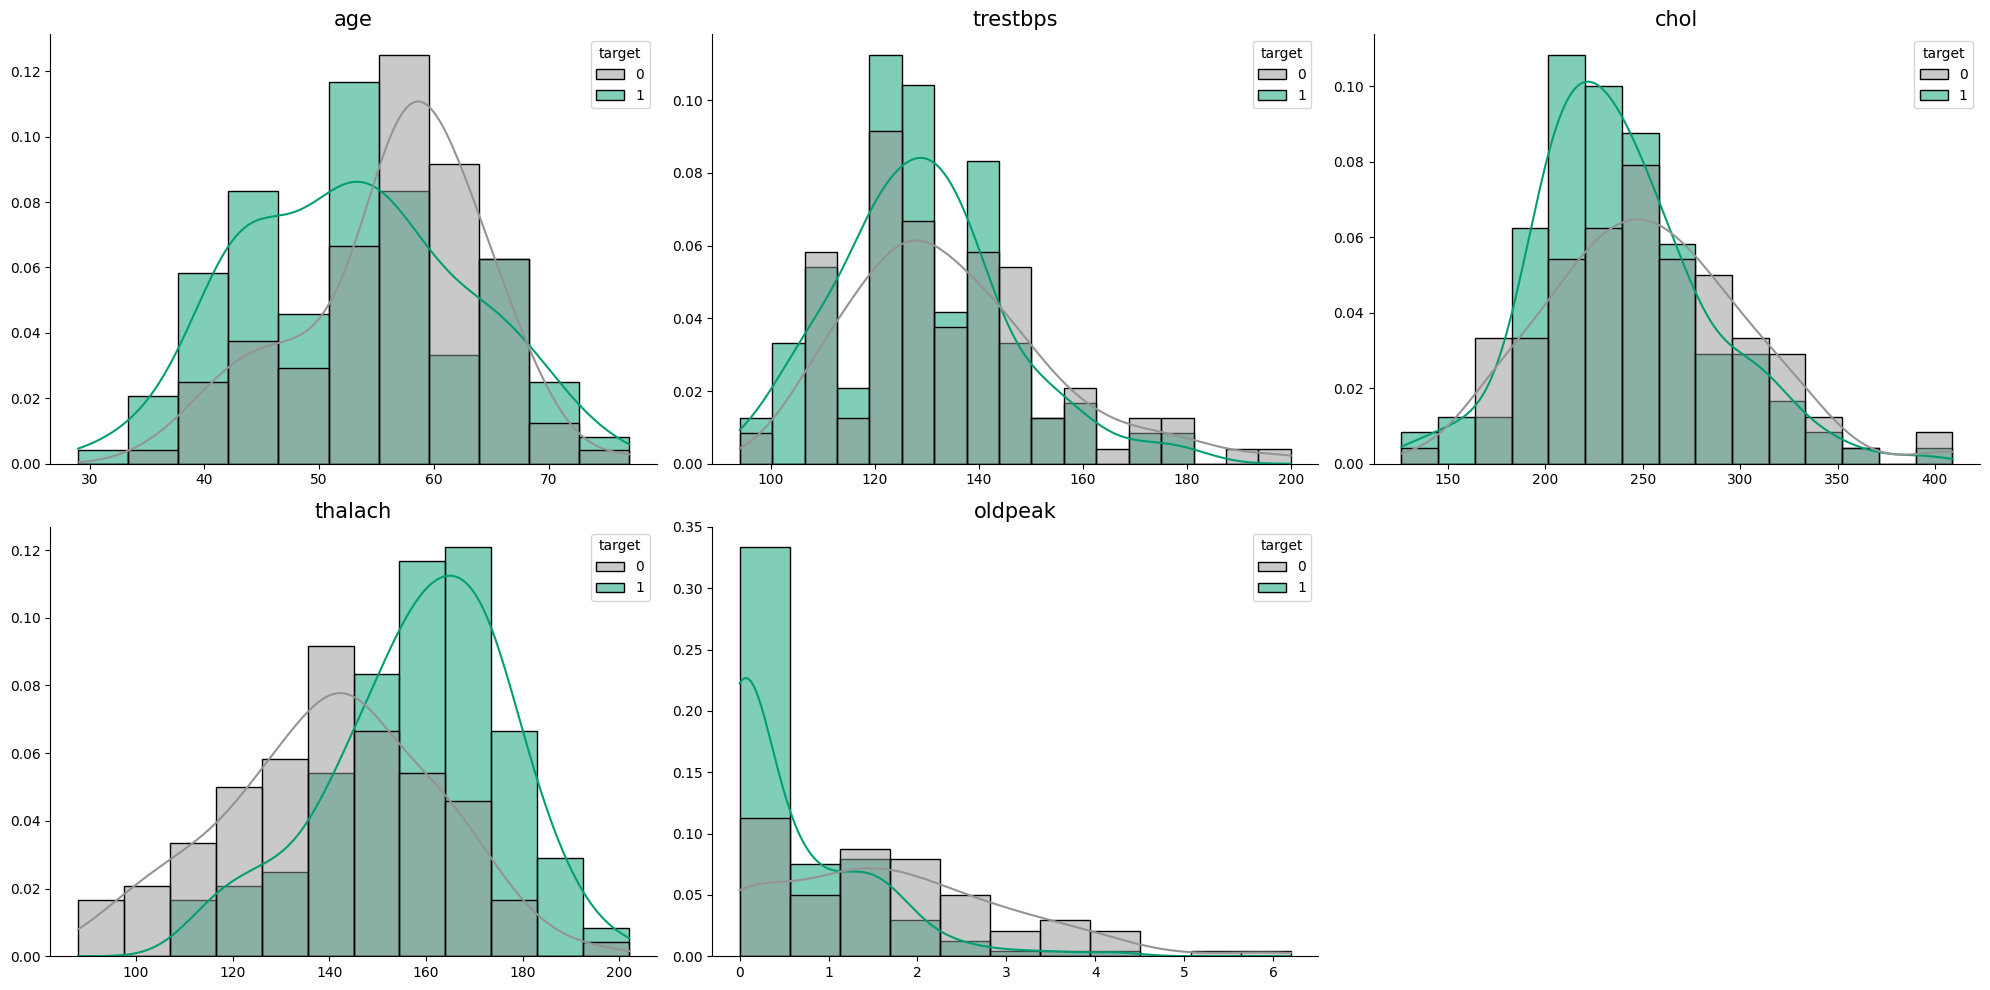

In [15]:
num_vars = len(numerical_features)
num_cols = 3 
num_rows = (num_vars // num_cols) + (1 if num_vars % num_cols != 0 else 0)

# Criando uma figura com subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop para plotar cada variável categórica
for num, feature in enumerate(numerical_features):
    sns.histplot(x=feature, data=df_train,hue='target', ax=axes[num],stat='proportion',palette=['#949494','#029E73'],kde=True)
    axes[num].set_title(f'{feature}',fontsize= 15)
    axes[num].set_xlabel("")
    axes[num].set_ylabel("")
    axes[num].spines["top"].set_visible(False) 
    axes[num].spines["right"].set_visible(False) 
         
# Removendo gráficos vazios
for i in range(num_vars, len(axes)):  
    axes[i].axis("off")

plt.tight_layout()
plt.show() 

## Observação:
- Os pacientes com a doença parecem ter idade menor do que a gente possa pensar, estão mais voltados para idades menores que 55 anos.
- A pressão arterial não aparenta ser um fator importante para decidir entre uma outra classe.
- Pacientes com problema no coração parecem ter parecem ter uma tedência a ter um colesterol menor que 250
- A frequência cardíaca parece ser mais alta nesses pacientes também.
- A também parece possuir um oldpeak igual a 0.

# Algumas perguntas a serem feitas:

-`1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?`

-`2. Existe uma relação entre o índice de massa corporal (IMC) e a chance de um ataque cardíaco?`

-`3. Quais são as características demográficas mais comuns entre os pacientes que tiveram um ataque cardíaco (idade, sexo, região, etc.)?`

-`4. Quem faz atividade física tem menos casos de ataque cardíaco?`

-`5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?`

-`6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?`

-`7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?`

-`8. Consigo construir um modelo para prever se o paciente terá ou não ataque do coração?`



# 1. Existe diferença na ocorrência de ataques cardíacos entre homens e mulheres? Além disso, existe diferença na faixa etária?


In [37]:
# Agrupando pelo gênero e somando a quantidade de pessoas que tiveram caso
df_heart_atck_by_gender = df.groupby('sex')['target'].sum()

In [46]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_grp'],
      dtype='object')

In [108]:
import pandas as pd

# Criando as faixas etárias corretamente como categoria ordenada
df['age_grp'] = pd.cut(df['age'], bins=range(25, 80, 5), right=False)

# Agrupando por faixa etária e sexo
df_occurrences_by_age_and_gender = df[df['target']==1].groupby(['sex', 'age_grp'], observed=True)['target'].sum().reset_index()

# Manter 'age_grp' como uma categoria ordenada
df_occurrences_by_age_and_gender['age_grp'] = df_occurrences_by_age_and_gender['age_grp'].astype(pd.CategoricalDtype(ordered=True))

# Ordenar corretamente primeiro pelo sexo e depois pela faixa etária
df_occurrences_by_age_and_gender.sort_values(by=['sex', 'age_grp'], ascending=[False, True], inplace=True)

df_occurrences_by_age_and_gender['age_grp'] =  df_occurrences_by_age_and_gender['age_grp'].astype(str)
df_occurrences_by_age_and_gender


,sex,age_grp,target
9,1,"[25, 30)",1
10,1,"[30, 35)",1
11,1,"[35, 40)",3
12,1,"[40, 45)",21
13,1,"[45, 50)",11
14,1,"[50, 55)",23
15,1,"[55, 60)",18
16,1,"[60, 65)",7
17,1,"[65, 70)",5
18,1,"[70, 75)",1


In [79]:
df_occurrences_by_age_and_gender.dtypes

sex         int64
age_grp    object
target      int64
dtype: object

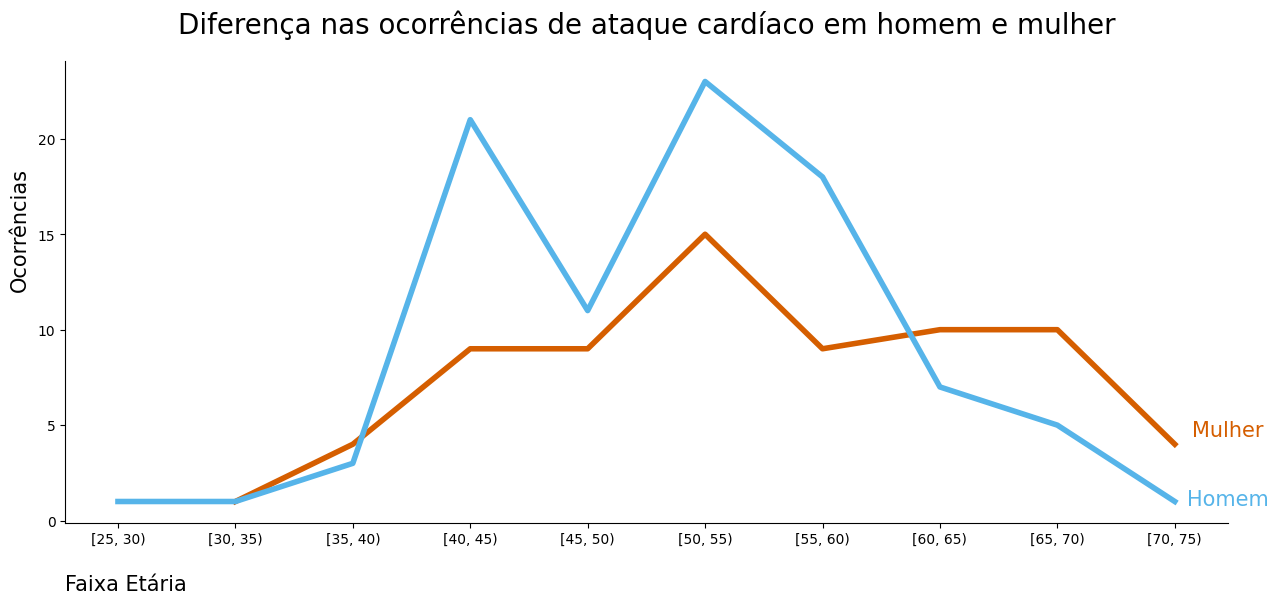

In [116]:
# Construindo o gráfico
plt.figure(figsize=(15, 6))

ax = sns.lineplot(y='target',x='age_grp',hue='sex',data=df_occurrences_by_age_and_gender,linewidth=4,palette=['#D55E00','#56B4E9'])
ax.set_ylabel('Ocorrências', fontsize=15,labelpad = 20, verticalalignment='top', horizontalalignment='left')
ax.set_xlabel('Faixa Etária', fontsize=15,labelpad = 20, loc='left')
ax.set_title('Diferença nas ocorrências de ataque cardíaco em homem e mulher',fontsize= 20, pad = 20,horizontalalignment='center')

# Removendo linhas de grade para maior clareza
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 

ax.legend().set_visible(False)
ax.text(1, 0.20, "Mulher", ha='center', va='center', transform=ax.transAxes, fontsize=15, color='#D55E00')
ax.text(1, 0.05, "Homem", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#56B4E9')
plt.show()

In [11]:
z_scores = stats.zscore(df_occurrences_by_age_and_gender['Heart_Attack'])

# Filtrar outliers
outliers = df_occurrences_by_age_and_gender[np.abs(z_scores) > 2]  # Usando 2 como o limite

print("Outliers detectados:")
print(outliers)

Outliers detectados:
    Gender Age_Group  Heart_Attack
0   Female  (10, 15]           219
10    Male  (10, 15]           216


## Conclusões:
Parece ser uma doença mais comum em homens, principalmente entre 30 e 60 anos, há um pico em mulheres também porém bem mais em homens.

# 2. Quais tipos de dor no peito são mais comuns entre os pacientes com doença cardíaca?

In [189]:
# Contar ataques cardíacos e não ataques cardíacos por cp
heart_attack_counts = df_train[df_train['target']==1]['cp'].value_counts(normalize=True)
no_heart_attack_counts = df_train[df_train['target']==0]['cp'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

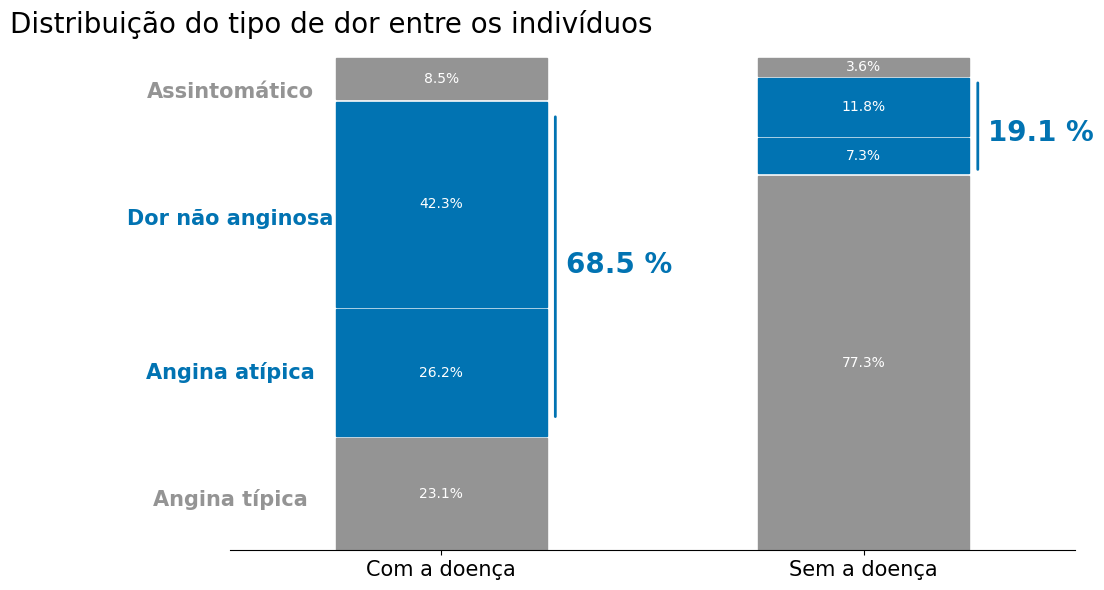

In [193]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6),legend=False)
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição do tipo de dor entre os indivíduos',fontsize=20,horizontalalignment='right')
plt.subplots_adjust(top=1)
sns.despine(left=True)

for i,container in enumerate(ax.containers):
    
    for j,bar in enumerate(container):
        bar.set_edgecolor('black')  # Cor da borda
        bar.set_linewidth(1)  # Espessura da borda
        if i==0 or i == 3:
            bar.set_color('#949494')
        else:
            bar.set_color('#0173B2')
        if bar.get_height() > 0:
            bar.set_y(bar.get_y() + i * 0.005)
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

# Indicando no gráfico
ax.annotate('',xy=(0.27,0.90), 
                xytext=(0.27,0.27),
                arrowprops=dict(color='#0173B2',linewidth=2,arrowstyle='-'),ha='center')
ax.text(0.46, 0.56, "68.5 %", ha='center', va='center', transform=ax.transAxes, fontsize=20, color ='#0173B2',fontweight='heavy')

ax.annotate('',xy=(1.27,0.97), 
                xytext=(1.27,0.78),  # Colocando o texto acima da barra
                arrowprops=dict(color='#0173B2',linewidth=2,arrowstyle='-'),ha='center')
ax.text(0.96, 0.82, "19.1 %", ha='center', va='center', transform=ax.transAxes, fontsize=20, color ='#0173B2',fontweight='heavy')

# Nomeando as categorias
ax.text(0, 0.90, "Assintomático", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#949494',fontweight='heavy')
ax.text(0, 0.65, "Dor não anginosa", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.35, "Angina atípica", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#0173B2',fontweight='heavy')
ax.text(0, 0.10, "Angina típica", ha='center', va='center', transform=ax.transAxes, fontsize=15, color ='#949494',fontweight='heavy')


plt.tight_layout()
plt.show()

## Conclusões:
- Podemos observar que há uma diferença grande entre entre os indíviduos que apresentaram angina atípica e dor não nao anginosa, entre os aqueles indivíduos que não obtiveram a doença e os que tiveram, isso pode indicar uma possível característica comum entre os pacientes doentes, o seu nível de dor no peito. Acredito que o `cp` talvez não precise ser codificado como um atributo cardinal, por conta do valor 4 representar assintomático, e dor não angínica. Além disso a dor mais comum entre as pessoas doentes é uma dor não anginosa.

# 3.A pressão arterial em repouso está associada à doença cardíaca?

Text(0.5, 0, '')

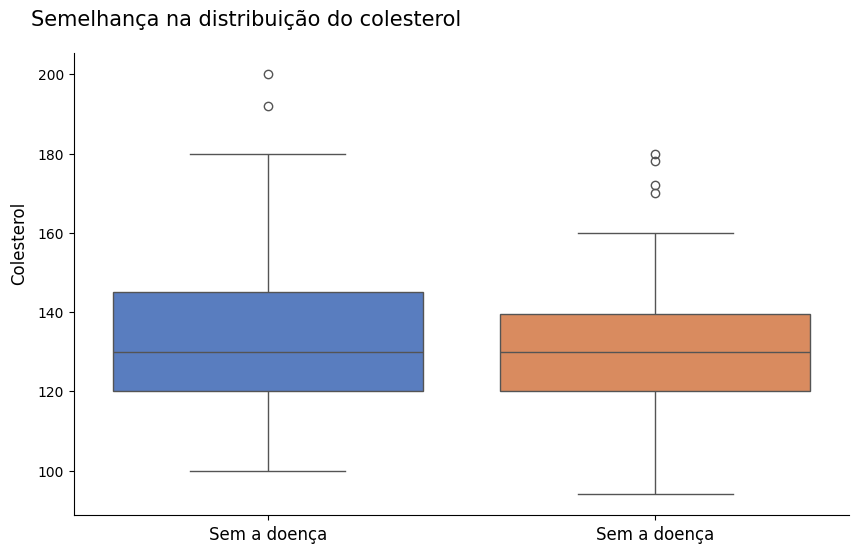

In [198]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='target',y='trestbps',data=df_train, hue='target' )
sns.despine(top=True)
ax.legend().set_visible(False)
ax.set_title('Semelhança na distribuição do colesterol', fontsize= 15,horizontalalignment='right',pad = 20)
ax.set_xticks(range(2),['Sem a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('Colesterol',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax.set_xlabel("")

In [ ]:
df_trestbps_disease = df_train[df_train['target'] == 1]['trestbps']
df_trestbps_not_disease = df_train[df_train['target'] == 0]['trestbps']

In [218]:
import scipy.stats as stats

def check_normality(data):
    """Realiza o Teste de Shapiro-Wilk para normalidade."""
    
    test_stat, p_value = stats.shapiro(data)  # Teste de normalidade
    print(f"p-valor: {p_value:.4f}")
    
    if p_value < 0.05:
        print("🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.")
    else:
        print("🟢 Falhou em rejeitar H₀: Os dados PODEM ser normalmente distribuídos.")



def check_mann_whitney(group1, group2):
    """
    Realiza o Teste de Mann-Whitney U para comparar se as distribuições de dois grupos são diferentes.
    """
    test_stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')  # Teste bilateral

    print(f"p-valor: {p_value:.4f}")

    if p_value < 0.05:
        print("🔴 Rejeita H₀: As distribuições dos grupos são diferentes.")
    else:
        print("🟢 Falhou em rejeitar H₀: Não há evidência de que as distribuições sejam diferentes.")



In [216]:
check_normality(df_trestbps_disease.to_list())
check_normality(df_trestbps_not_disease.to_list())

p-valor: 0.0079
🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.
p-valor: 0.0002
🔴 Rejeita H₀: Os dados NÃO são normalmente distribuídos.


In [219]:
check_mann_whitney(df_trestbps_disease.to_list(),df_trestbps_not_disease.to_list())

p-valor: 0.0563
🟢 Falhou em rejeitar H₀: Não há evidência de que as distribuições sejam diferentes.


In [187]:
df[['target','trestbps']]

,target,trestbps
0,1,145
1,1,130
2,1,130
3,1,120
4,1,120
...,...,...
298,0,140
299,0,110
300,0,144
301,0,130


In [ ]:
df_by_region = df.loc[df['Heart_Attack'],'Region']

In [28]:
df.loc[df['Heart_Attack'],'Region'].value_counts(normalize=True)

Region
Urban       0.493794
Rural       0.300969
Suburban    0.205237
Name: proportion, dtype: float64

In [29]:
df.loc[~df['Heart_Attack'],'Region'].value_counts(normalize=True)

Region
Urban       0.501598
Rural       0.298647
Suburban    0.199755
Name: proportion, dtype: float64

In [68]:
# Contar ataques cardíacos e não ataques cardíacos por região
heart_attack_counts = df[df['Heart_Attack']]['Region'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Region'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T


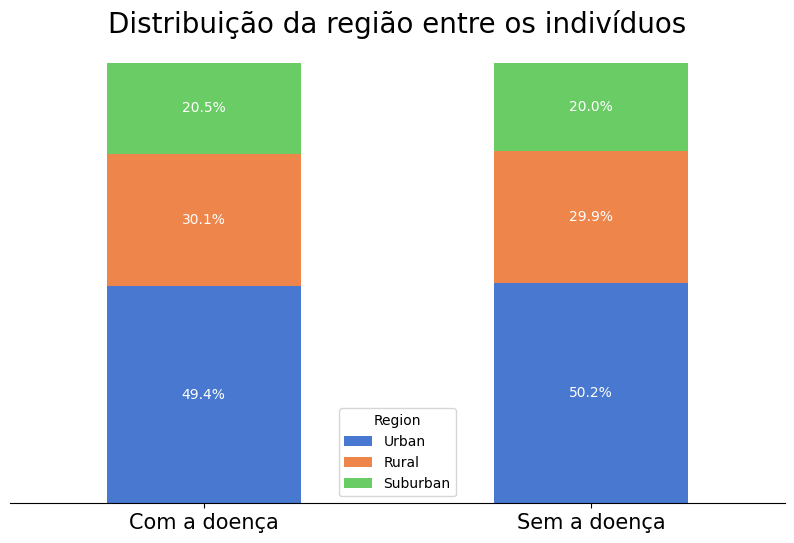

In [85]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Distribuição da região entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusão:
- Não há uma diferença significativa pela região, e por conta dos valores serem bem parelhos, eu diria que provavelmente seja uma amostra estratificada da base.

# 4. Quem faz atividade física tem menos casos de ataque cardíaco?

In [36]:
df.loc[df['Heart_Attack'],'Exercise_Level'].value_counts(normalize=True)

Exercise_Level
Moderate    0.499235
Low         0.301139
High        0.199626
Name: proportion, dtype: float64

In [34]:
df.loc[~df['Heart_Attack'],'Exercise_Level'].value_counts(normalize=True)

Exercise_Level
Moderate    0.498878
Low         0.302115
High        0.199007
Name: proportion, dtype: float64

In [94]:
# Contar ataques cardíacos e não ataques cardíacos por exercício
heart_attack_counts = df[df['Heart_Attack']]['Exercise_Level'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Exercise_Level'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

stacked_data


Exercise_Level,Moderate,Low,High
Heart_Attack,0.499235,0.301139,0.199626
No_Heart_Attack,0.498878,0.302115,0.199007


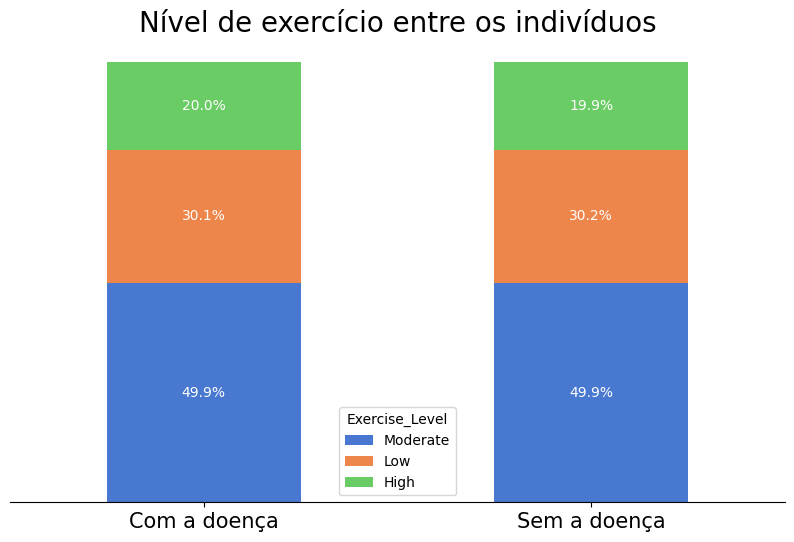

In [95]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Nível de exercício entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusões:
- Parece ser o mesmo caso que o da região onde parece não haver diferença entre os indivíduos

# 5. Qual é o impacto do histórico familiar na ocorrência de ataques cardíacos?

In [99]:
df.loc[df['Heart_Attack'],'Heart_Disease_History'].value_counts(normalize=True)

Heart_Disease_History
False    0.857337
True     0.142663
Name: proportion, dtype: float64

In [100]:
df.loc[~df['Heart_Attack'],'Heart_Disease_History'].value_counts(normalize=True)

Heart_Disease_History
False    0.852422
True     0.147578
Name: proportion, dtype: float64

In [101]:
# Contar ataques cardíacos e não ataques cardíacos por histórico de doença
heart_attack_counts = df[df['Heart_Attack']]['Heart_Disease_History'].value_counts(normalize=True)
no_heart_attack_counts = df[~df['Heart_Attack']]['Heart_Disease_History'].value_counts(normalize=True)

# Combinar as contagens em um DataFrame
stacked_data = pd.DataFrame({
    'Heart_Attack': heart_attack_counts,
    'No_Heart_Attack': no_heart_attack_counts
}).T

stacked_data

Heart_Disease_History,False,True
Heart_Attack,0.857337,0.142663
No_Heart_Attack,0.852422,0.147578


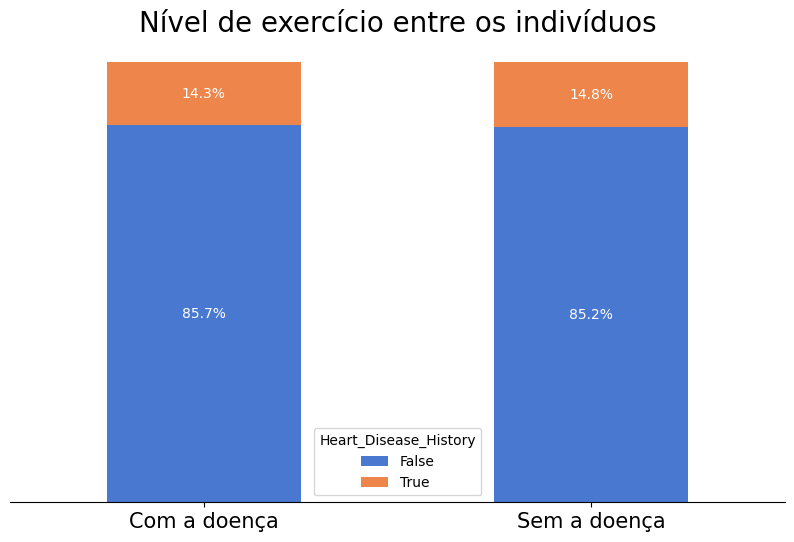

In [102]:
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(2),['Com a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,rotation=0, ha='center')
ax.set_title('Nível de exercício entre os indivíduos',fontsize=20)
sns.despine(left=True)
for container in ax.containers:
    
    for bar in container:
        if bar.get_height() > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width() / 2  # Centralizar o rótulo na barra
            y = bar.get_y() + height / 2  # Centralizar o rótulo verticalmente
            ax.text(x, y, f'{height*100:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()

## Conclusões:
- Mesmo caso da região e do nível de exercício

# 6. Qual é a distribuição de níveis de colesterol entre os pacientes com e sem ataques cardíacos?

In [103]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

Text(0.5, 0, '')

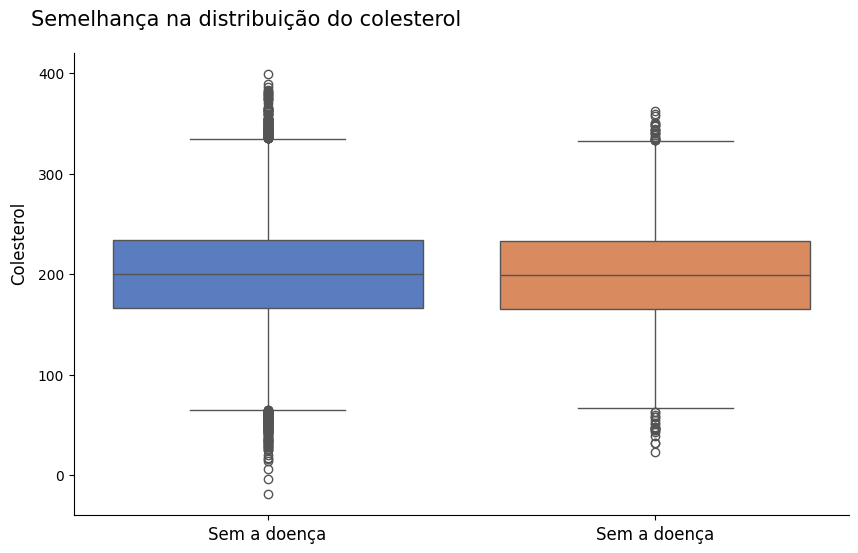

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Heart_Attack',y='Cholesterol',data=df, hue='Heart_Attack' )
sns.despine(top=True)
ax.legend().set_visible(False)
ax.set_title('Semelhança na distribuição do colesterol', fontsize= 15,horizontalalignment='right',pad = 20)
ax.set_xticks(range(2),['Sem a doença','Sem a doença'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_ylabel('Colesterol',fontsize=12, verticalalignment='top', horizontalalignment='left',labelpad= 20)
ax.set_xlabel("")

## Conclusões:
- Podemos observar que há alguns outliers em ambos,mais para as pessoas que não tiveram a doença, mas isso provavelmente se deve ao fato de serem classes desbalanceadas. Ademais, observando as duas amostras assim não parece haver diferença a 

# 7. Quais variáveis (idade, pressão arterial, colesterol, etc.) têm maior correlação com a ocorrência de ataques cardíacos?

In [176]:
corr_matrix = df.corr(numeric_only= True)

In [177]:
corr_matrix['target'].sort_values(ascending=False)

target      1.000000
cp          0.430339
thalach     0.418146
slope       0.341977
restecg     0.132491
fbs        -0.025594
chol       -0.077575
trestbps   -0.147620
age        -0.217435
sex        -0.286312
thal       -0.342163
ca         -0.427160
oldpeak    -0.427577
exang      -0.434432
Name: target, dtype: float64

In [179]:
corr_matrix['target'].index

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

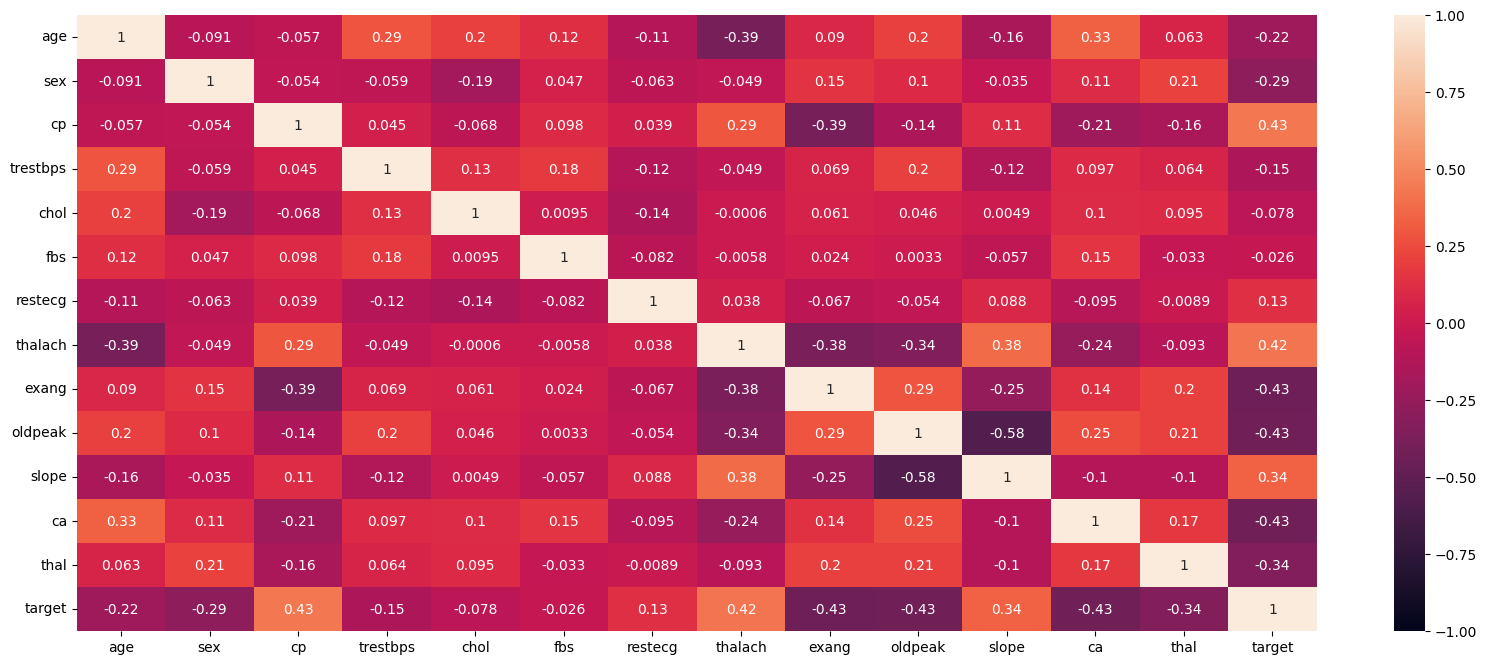

In [180]:
plt.figure(figsize=(20,8))
sns.heatmap(data=corr_matrix,vmin=-1,vmax=1,annot=True)

In [64]:
df_only_numeric = df.select_dtypes(include=[np.number,np.bool])
for numeric_column in df_only_numeric.columns:
    coef, p = spearmanr(df['Heart_Attack'], df[numeric_column])
    print(f"Coluna {numeric_column} ,Spearman: coef={coef}, p={p}")
    print("*Estatisticamente significativa*\n" if p < 0.05 else "Estatísticamente não significativa\n")

Coluna Age ,Spearman: coef=0.0008597857009843417, p=0.8475470426747591
Estatísticamente não significativa

Coluna Blood_Pressure ,Spearman: coef=-0.009612123645574412, p=0.03160808358471701
*Estatisticamente significativa*

Coluna Cholesterol ,Spearman: coef=-0.0036903735837083155, p=0.40927235866993883
Estatísticamente não significativa

Coluna BMI ,Spearman: coef=-0.0014906473500769643, p=0.738899738692331
Estatísticamente não significativa

Coluna Heart_Rate ,Spearman: coef=-0.002223682750805387, p=0.6190347915349126
Estatísticamente não significativa

Coluna Smoking ,Spearman: coef=0.01011335760684491, p=0.023733459461813333
*Estatisticamente significativa*

Coluna Diabetes ,Spearman: coef=-0.004788754301380906, p=0.28426953863471893
Estatísticamente não significativa

Coluna Family_History ,Spearman: coef=0.0003220715956775021, p=0.9425894934255479
Estatísticamente não significativa

Coluna Stress_Level ,Spearman: coef=-0.005855962676983443, p=0.1903949806232977
Estatísticamente n

## Conclusões:
- Apesar de haver uma certa correlação entre fumar e ter ataque do coração ela é bem fraca, também há uma correlação negativa entre a pressão do sangue que também é fraca, tentei utilizar a correlação não linear de Spearman, mas mesmo assim não houve tanta mundança , mas apenas disso houveram indícios de que algumas correlações observadas são estatísticamente significativas.

In [41]:
df.loc[~df['Heart_Attack'],'Diabetes'].value_counts(normalize=True)

Diabetes
False    0.849135
True     0.150865
Name: proportion, dtype: float64

In [42]:
df.loc[df['Heart_Attack'],'Diabetes'].value_counts(normalize=True)

Diabetes
False    0.854447
True     0.145553
Name: proportion, dtype: float64

In [44]:
df.loc[df['Heart_Attack']]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
6,7,50,Male,Suburban,116.8,206.9,27.9,75,High,True,...,Middle,Moderate,Primary,Married,Urban,True,1,1.7,10,True
8,9,34,Male,Urban,131.8,244.6,24.4,65,Low,False,...,High,Moderate,Primary,Married,Rural,False,1,4.7,7,False
15,16,14,Female,Suburban,121.9,242.1,18.2,73,Moderate,False,...,Low,Low,Secondary,Married,Rural,True,1,1.4,2,False
21,22,49,Male,Urban,120.9,202.9,25.8,63,High,False,...,Low,Moderate,Secondary,Married,Rural,False,4,1.8,3,False
28,29,36,Male,Rural,104.8,241.8,24.2,98,High,False,...,Low,High,Secondary,Single,Urban,True,5,3.5,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,49979,53,Female,Urban,153.3,217.1,20.5,61,Moderate,False,...,Middle,High,Primary,Single,Rural,False,5,2.8,9,False
49982,49983,24,Female,Rural,65.7,200.1,24.0,99,Moderate,True,...,Middle,Low,Secondary,Married,Urban,False,4,2.4,2,False
49988,49989,53,Male,Rural,133.4,195.9,29.7,71,Low,True,...,Middle,Low,Primary,Single,Urban,False,4,2.5,10,False
49991,49992,50,Male,Suburban,134.0,230.7,26.2,97,Moderate,True,...,Middle,Moderate,Secondary,Married,Urban,False,4,2.8,7,False


In [45]:
df.loc[~df['Heart_Attack']]

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,37,Male,Rural,137.2,163.2,22.2,91,Low,True,...,Low,Moderate,Higher,Single,Urban,False,2,3.6,4,False
49995,49996,56,Other,Rural,87.7,256.8,25.3,71,Low,True,...,Middle,High,Primary,Divorced,Urban,True,4,4.9,1,False
49996,49997,16,Male,Rural,125.2,102.9,25.1,77,Moderate,True,...,Middle,High,Secondary,Single,Urban,False,3,4.4,4,True
49997,49998,46,Female,Suburban,116.2,160.6,27.7,63,Low,True,...,Middle,Low,Secondary,Single,Urban,False,2,2.4,7,False


In [46]:
df.columns

Index(['ID', 'Age', 'Gender', 'Region', 'Blood_Pressure', 'Cholesterol', 'BMI',
       'Heart_Rate', 'Exercise_Level', 'Smoking', 'Alcohol_Consumption',
       'Diabetes', 'Family_History', 'Stress_Level', 'Heart_Attack', 'Angina',
       'Heart_Disease_History', 'Diet', 'Sleep_Hours', 'Occupation',
       'Income_Level', 'Physical_Activity', 'Education_Level',
       'Marital_Status', 'Urban_Rural', 'Medication', 'Health_Awareness',
       'Daily_Water_Intake', 'Mental_Health', 'Obesity'],
      dtype='object')

In [47]:
df.loc[df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.396361
Mixed        0.308281
Unhealthy    0.295358
Name: proportion, dtype: float64

In [49]:
df.loc[~df['Heart_Attack'],'Diet'].value_counts(normalize=True)

Diet
Healthy      0.395703
Mixed        0.303089
Unhealthy    0.301208
Name: proportion, dtype: float64

In [51]:
df.loc[df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.026441081448733)

In [52]:
df.loc[~df['Heart_Attack'],'Sleep_Hours'].mean()

np.float64(7.009467576327659)

In [57]:
df.loc[df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.898997
True     0.101003
Name: proportion, dtype: float64

In [58]:
df.loc[~df['Heart_Attack'],'Angina'].value_counts(normalize=True)

Angina
False    0.900904
True     0.099096
Name: proportion, dtype: float64

In [ ]:
df

In [73]:
grouped_data = df.groupby(['Cholesterol', 'Diabetes', 'Stress_Level', 'Family_History'])['Heart_Attack'].mean().reset_index()
key_risk_factors = grouped_data.sort_values('Heart_Attack', ascending=False)



print("Top 10 key risk factors contributing to heart attacks")
key_risk_factors.reset_index()

Top 10 key risk factors contributing to heart attacks


,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
32023,3158,126.7,True,8,False,0.0
32024,56,47.2,False,4,True,0.0
32025,57,47.2,False,8,True,0.0
32026,3159,126.7,True,10,True,0.0


In [72]:
key_risk_factors.reset_index()[key_risk_factors.reset_index()['Heart_Attack']==1]

,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,14142,191.0,True,3,False,1.0
1,7,23.3,False,1,False,1.0
2,2767,123.1,False,3,False,1.0
3,7228,155.9,True,4,False,1.0
4,13091,186.2,False,4,True,1.0
...,...,...,...,...,...,...
2453,30475,291.5,False,6,False,1.0
2454,4901,140.7,False,10,False,1.0
2455,30506,291.9,False,9,False,1.0
2456,30507,291.9,False,10,True,1.0


In [74]:
df.loc[df['Heart_Attack'],'Cholesterol'].value_counts(normalize=True)

Cholesterol
212.4    0.002211
196.0    0.002040
177.7    0.002040
206.3    0.001870
199.6    0.001870
           ...   
191.5    0.000170
94.4     0.000170
331.7    0.000170
88.0     0.000170
310.0    0.000170
Name: proportion, Length: 1945, dtype: float64

# 8

In [81]:
categorical_features = df.select_dtypes(['object','bool']).columns.tolist()
numerical_features = df.select_dtypes('number').columns.tolist()

In [82]:
X = df.drop(columns=['Heart_Attack'])
y = df['Heart_Attack'].copy()
categorical_features.remove('Heart_Attack')
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y,test_size = 0.3,random_state=42)

In [76]:
# Mantendo as proporções
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Heart_Attack
False    0.882371
True     0.117629
Name: proportion, dtype: float64
Heart_Attack
False    0.8824
True     0.1176
Name: proportion, dtype: float64


In [81]:
print(f"Dataset de treino shape {X_train.shape}")
print(f"Alvo treino shape {y_train.shape}")
print(f"Dataset de teste shape {X_test.shape}")
print(f"Alvo teste shape {y_test.shape}")

Dataset de treino shape (35000, 28)
Alvo treino shape (35000,)
Dataset de teste shape (15000, 28)
Alvo teste shape (15000,)


## Variáveis categoricas 

In [90]:
for feature in categorical_features:
    print('-'*80)
    print(X_train[feature].value_counts(normalize=True))

--------------------------------------------------------------------------------
Gender
Female    0.483829
Male      0.478343
Other     0.037829
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Region
Urban       0.503971
Rural       0.297657
Suburban    0.198371
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Exercise_Level
Moderate    0.497886
Low         0.303714
High        0.198400
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Smoking
False    0.701314
True     0.298686
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Alcohol_Consumption
Moderate    0.799234
Heavy       0.200766
Name: proportion, dtype: float64
--------------------------------------------------------------------------------
Diabetes
False    0.850429
True

# Considerações sobre as categorias:

- Nas variáveis Obesity,Medication,Heart_Disease_History,Angina,Family_History,Diabetes,Alcohol_Consumption,Smoking serão aplicados o One-Hot enconding.
- Variáveis Education_level,Physical_Activity,Income_Level,Exercise_Level, podem ser utilizados ordinal encondings, para preservar esse comportamento.
- Para as demais vou aplicar o target encoding a fim de evitar uma matriz muito sparsa.
- Vou remover a coluna Urban_Rural não parece indicar nada demais e a Alcohol_Consumption pois há muitos valores nulos.

In [87]:
ordinal_enconding = ['Education_Level','Physical_Activity','Income_Level','Exercise_Level']
one_hot_enconding = ['Obesity','Medication','Heart_Disease_History','Angina','Family_History','Diabetes','Smoking']
target_enconding = ['Marital_Status','Occupation','Diet','Region','Gender']

## Considerações sobre as variáveis numéricas:
- Vamos usar o standard scaler para escalonar nossos dados, pois alguns algoritmos são mais sensíveis à isso.

In [84]:
X_train.drop(['ID','Urban_Rural','Alcohol_Consumption'],axis = 1,inplace=True)

In [6]:
import sklearn
print(sklearn.__version__)
from sklearn.preprocessing import TargetEncoder

1.6.1


In [97]:

enc_auto = TargetEncoder(smooth="auto")
full_pipeline = ColumnTransformer(
    transformers=[
        ('one_hot_encoder', OneHotEncoder(), one_hot_enconding),  # Aplicando OneHotEncoder na coluna 'categoria_1'
        ('ordinal_encoder', OrdinalEncoder(), ordinal_enconding),  # Aplicando OrdinalEncoder na coluna 'categoria_2'
        ('target_encoder', enc_auto, target_enconding)  # Aplicando TargetEncoder na coluna 'categoria_1'
    ],remainder="passthrough"
)

In [98]:
X_train_prepared = full_pipeline.fit_transform(X_train,y_train)

In [100]:
X_train_prepared.shape

(35000, 33)

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rnd_forest_clf = RandomForestClassifier(random_state=42)

val_scores = cross_val_score(rnd_forest_clf,X_train_prepared,y_train,cv=5,scoring='precision')

c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Fiuza\Desktop\Projetos\HeartAttack\Heart-Attack-Prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this 

In [107]:
val_scores

array([0., 0., 0., 0., 0.])

In [76]:
X_test['Income_Level'].value_counts(normalize=True)

Income_Level
Middle    0.398733
Low       0.398133
High      0.203133
Name: proportion, dtype: float64